# Obdelava podatkov

## Priprava

Najprej uvozimo potrebna paketa in omejimo število izpisanih vrstic tabele, saj bomo delali z razpredelnicami velikih razsežnosti.

In [58]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10

## Uvoz podatkov

Uvozimo podatke, ki smo jih predelali v datoteki `uvoz_podatkov.py`.

In [59]:
epizode = pd.read_csv('vse_epizode.csv', index_col="id")
reziserji = pd.read_csv('reziserji.csv', index_col="id")
zanri = pd.read_csv('zanri.csv')

## Analiza podatkov

V tem razdelku si bomo ogledali in testirali vse hipoteze, ki sem jih postavil v sami zasnovi projektne naloge. Hipoteze bomo preverjali v enakem vrstnem redu, kot so zapisane v opisu naloge.

### 1. hipoteza

Katera serija ima v povprečju najbolje ocenjene epizode?

In [60]:
serije = epizode[['serija', 'ocena']].groupby('serija')
serije = serije.mean().sort_values('ocena', ascending = False)
serije = serije.rename(index=str, columns = {'ocena': 'povprecna_ocena'})
serije[:10]

,povprecna_ocena
serija,
LazyTown,10.000000
Pod ruso,9.800000
Avatar: The Last Airbender,9.800000
Star Wars: Rebels,9.800000
Gravity Falls,9.800000
Billions,9.700000
Parki in rekreacija,9.633333
Banshee,9.600000
The Legend of Korra,9.600000


Kot je iz razpredelnice razvidno, je v povprečju najbolje ocenjena serija LazyTown, sledita pa ji Pod rušo ter Avatar: The Last Airbender.

Iz tabele serije ugotovimo, da imajo najboljše povprečne ocene serije, ki se ponovijo bolj malokrat. Iz tega lahko skepamo, da imajo dovoljšno število glasov pri teh serijah le najbolj popularne epizode. Zaradi tega ponovimo prejšnji postopek le za tiste serije, za katere imamo v prvotni tabeli vsaj 5 epizod.

In [61]:
serije2 = serije
serije2['st_ponovitev'] = epizode[['serija', 'ocena']].groupby('serija').count()
serije2 = serije2[serije2.st_ponovitev >= 5]
serije2[:10]

,povprecna_ocena,st_ponovitev
serija,,
One Punch Man: Wanpanman,9.466667,6
How to Get Away with Murder,9.320000,5
Sinovi anarhije,9.300000,8
Futurama,9.240000,5
Nepremagljivi dvojec,9.238889,18
Community,9.204762,21
Shingeki no kyojin,9.183333,6
Igra prestolov,9.107463,67
Lov na osumljenca,9.098765,81


Prejšnji sklep je bil očitno pravilen, saj je vseh 10 serij drugačnih kot prej. Ugotovimo pa lahko, da je najbolje ocenjena serija z vsaj 5 epizodami z dovoljšnim številom glasov One Punch Man: Wanpanman, sledita pa ji How To Get Away with Murder in Sinovi anarhije. Spet pa lahko opazimo, da ima prvih par serij manj kot 10 ponovitev. Najbolje ocenjeni seriji z vsaj 10 ponovitvami sta Nepramagljivi dvojec in Community, izstopata pa tudi seriji Igra prestolov in Lov na osumljenca, ki imata več kot 50 ponovitev, njuna povprečna ocena pa vseeno presega 9.0.

### 2. hipoteza

Ali obstaja povezava med trajanjem in oceno epizode?

In [62]:
%matplotlib inline

[Text(0, 0.5, 'Ocena'), Text(0.5, 0, 'Dolžina')]

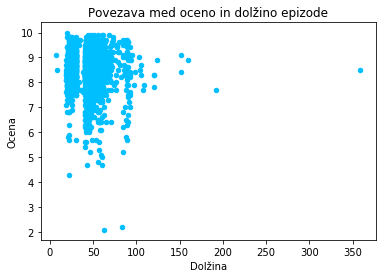

In [63]:
epizode.plot.scatter('dolzina', 'ocena', title = 'Povezava med oceno in dolžino epizode', color = 'deepskyblue').set(xlabel='Dolžina', ylabel='Ocena')

Iz zgornjega grafa ni preveč očitno, kakšna je povezava med dolzino in oceno epizode, zato bomo nekaj epizod z precej nadpovprečnim trajanjem odstranili.

[Text(0, 0.5, 'Ocena'), Text(0.5, 0, 'Dolžina')]

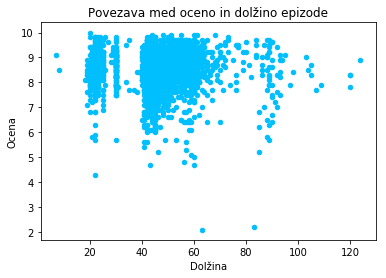

In [64]:
epizode[epizode.dolzina < 150].plot.scatter('dolzina', 'ocena', title = 'Povezava med oceno in dolžino epizode',
                                            color = 'deepskyblue').set(xlabel='Dolžina', ylabel='Ocena')

Močne povezave med trajanjem epizode in njeno oceno iz zgornjega grafa ni mogoče opaziti, kar je v nasprotju z mojimi pričakovanji. Najbrž pa razlog za to dejstvo tiči v tem, da se pri krajših (ponavadi komičnih) serijah zgodba ne navezuje tako močno na prejšnje epizode, zato so bolje gledane le najboljše epizode teh serij. Posledično imajo samo te dovolj glasov, da jih upoštevamo, iz česar sledi boljša povprečna ocena serij s trajanjnem manj kot pol ure.

Poleg tega lahko opazimo tudi nekakšno mejo med trajanji 30 in 40 minut, kar po moji predpostavki določa mejo med komičnimi in nekomičnimi serijami. To predpostavko bomo preverjali v nadaljevanju.

### 3. hipoteza

V katerem petletju je izšlo največ epizod?

[Text(0.5, 0, 'Petletje')]

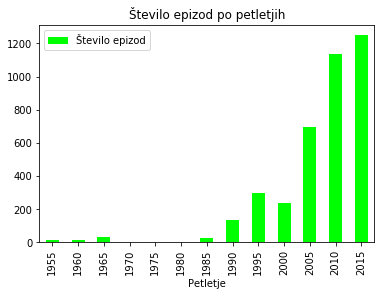

In [65]:
epizode['petletje'] = 5 * (epizode.leto // 5)
epizode_po_petletjih = epizode[['serija', 'petletje']].groupby('petletje').count()
epizode_po_petletjih = epizode_po_petletjih.rename(index=str, columns = {'serija': 'Število epizod'})

epizode_po_petletjih.plot.bar(color = 'lime', title = 'Število epizod po petletjih').set(xlabel='Petletje')

Kot lahko opazimo v zgornjem grafu, je največ epizod izšlo v petletju 2015-2020, ki pa ga seveda še zdaleč ni konec. Iz tega dejstva ter iz trenda naraščanja, opaženega v preteklih petletjih, torej lahko ugotovimo, da se popularnost serij in posledično število le-leh v zadnjih letih krepko povečuje.

### 4. hipoteza

Kateri režiser ustvarja najboljše epizode?

In [66]:
ustvarjalci = pd.merge(epizode, reziserji, left_on='id', right_on='id')
ustvarjalci = ustvarjalci[['ocena', 'reziser']].groupby('reziser')
ustvarjalci = ustvarjalci.mean().sort_values('ocena', ascending = False)
ustvarjalci = ustvarjalci.rename(index=str, columns = {'ocena': 'povprecna_ocena'})
ustvarjalci[:10]

,povprecna_ocena
reziser,
Magnús Scheving,10.0
Bill Lawrence,9.8
Dave Filoni,9.8
Jeff Melman,9.8
Joaquim Dos Santos,9.8
Aaron Long,9.7
Chris Koch,9.7
Karyn Kusama,9.7
John Michel,9.7


Zgornja razpredelnica prikazuje režiserje, ki imajo v povprečju najbolje ocenjene epizode, ki jih režirajo. Ker pa se mi je med obravnavo razpredelnice dozdevalo, da prihaja do podobnega problema kot pri analizi najbolje ocenjenih serij, bomo ponovili podoben postopek kot prej, torej bomo obravnavali le režiserje, ki so režirali dovoljšnje število epizod.

In [67]:
ustvarjalci2 = pd.merge(epizode, reziserji, left_on='id', right_on='id')
ustvarjalci2 = ustvarjalci2[['ocena', 'reziser']].groupby('reziser').count()
ustvarjalci2 = ustvarjalci2.rename(index=str, columns = {'ocena': 'st_ponovitev'})
ustvarjalci2 = pd.merge(ustvarjalci, ustvarjalci2, left_on='reziser', right_on='reziser')
ustvarjalci2 = ustvarjalci2[ustvarjalci2.st_ponovitev >= 5]
ustvarjalci2[:10]

,povprecna_ocena,st_ponovitev
reziser,,
Shingo Natsume,9.466667,6
Chris Fisher,9.321429,14
Cary Joji Fukunaga,9.300000,8
Matt Shakman,9.222222,9
Tetsurô Araki,9.183333,6
Peter Gould,9.160000,5
Vince Gilligan,9.136364,11
Frederick E.O. Toye,9.100000,11
David Caffrey,9.100000,6


Na podoben način kot pri serijah smo se omejili na režiserje, ki so režirali vsaj 5 epizod z dovoljšnim številom glasov. Pridemo do podobnega sklepa, da so imeli najboljše povprečne ocene res režiserji z manjšim številom epizod. Če pa si ogledamo le tiste, ki so se pojavili dovoljkrat, ugotovimo, da je najbolj uspešen Shingo Natsume, sledita pa mu Chris Fisher in Cary Joji Fukunaga. 

Na tem mestu omenimo še zanimivost, da je Shingo Natsume znan predvsem po režiranju epizod serije One Punch Man, za katero smo prej prav tako ugotovili, da je najbolje povprečno ocenjena serija.

### 5. hipoteza

Kakšna je povezava med številom glasov in oceno?

[Text(0, 0.5, 'Ocena'), Text(0.5, 0, 'Število glasov')]

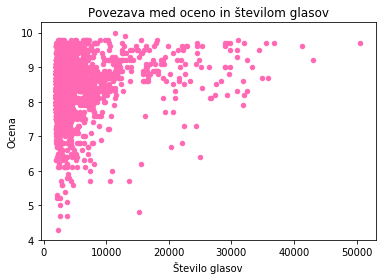

In [68]:
epizode[(epizode.st_glasov < 60000) & (epizode.ocena > 3)].plot.scatter('st_glasov','ocena', color = 'hotpink', title = 'Povezava med oceno in številom glasov').set(xlabel='Število glasov', ylabel='Ocena')

Pri obravnavi povezave med oceno in številom glasov se zaradi večje preglednosti znebimo parih izjem; to so epizode z res veliko večjim številom glasov (te so zelo dobro ocenjene) ter epizode z zelo nizkimi ocenami (te pa so imele malo število glasov) in opazimo, da so večinoma kakovost epizode narašča s številom glasov. Tiste, ki imajo veliko glasov so dobro ocenjene, za epizode z malo glasovi pa velja, da so lahko zelo slabo ocenjene, vendar pa so lahko ocenjene tudi zelo dobro. 

Dodajmo še komentar, da vse epizode, katerih zaradi prevelikega števila glasov nismo upoštevali, pripadajo bodisi seriji Kriva pota bodisi Igri prestolov, ki veljata za eni izmed najboljših in najbolj popularnih serij našega časa, kar je seveda tudi razlog za tako številčno ocenjevanje.

### 6. hipoteza

Ali z se z leti kakovost serij izboljšuje?

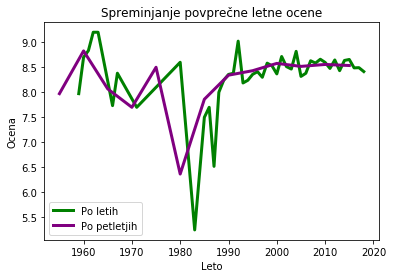

In [69]:
kakovost = epizode[['leto', 'ocena', 'petletje']]
kakovost1 = kakovost[['leto', 'ocena']].groupby('leto').mean()
kakovost2 = kakovost[['petletje', 'ocena']].groupby('petletje').mean()

plt.plot(kakovost1, color = 'g', lw = 3)
plt.plot(kakovost2, color = 'purple', lw = 3)
plt.title('Spreminjanje povprečne letne ocene')
plt.xlabel('Leto')
plt.ylabel('Ocena')
plt.legend(['Po letih', 'Po petletjih'])

Graf gibanja povprečne letne ocene nam pove, da se dejansko kakovost epizod oziroma serij z leti v povprečju ne povečuje, vendar pa je vseeno vse bolj konstantna oziroma ima prisotnih vse manj izrazitih nihanj. Nekaj zaslug za tak graf bi najbrž lahko pripisali dejstvu, da so od starejših serij bolj gledane in ocenjene predvsem najboljše epizode serij, prav tako pa se kvantiteta epizod z leti povečuje, kar smo ugotovili v 3. hipotezi. Zaradi tega bo vsaka nadpovprečno dobra ali nadpovprečno slaba epizoda imela v kasnejših letih manjši vpliv na povprečno letno oceno, kar zagotovo prispeva k vse manjšemu nihanju.

Opazimo lahko tudi, da smo se z prikazom povprečne ocene epizod glede na petletje večine nihanja znebili, sicer pa je oblika grafa precej podobna prvotnemu. Zaradi zaokroževanja pri petletjih seveda pride tudi do delnih zamikov.

## Komične vs nekomične serije

V zadnjem razdelku pa si bomo, kot sem si to zadal v zasnovi projektne naloge, ogledali primerjavo med komičnimi in nekomičnimi serijami.

Za začetek si oglejmo, če moja hipoteza o povezavi med trajanjem posamezne epizode in njenim žanrom sploh res drži, t.j. če imajo vse epizode komičnih serij trejanje res manjše od 30 min oz. če imajo vse nekomične serije trajanje epizod nad 30 minutami.

In [70]:
izjeme = pd.merge(epizode, zanri, left_on='serija', right_on='serija')
izjeme = izjeme[['serija', 'epizoda', 'dolzina', 'ocena', 'st_glasov', 'zanr']]
izjeme[(izjeme.dolzina > 30) & (izjeme.zanr == 'Comedy')]

,serija,epizoda,dolzina,ocena,st_glasov,zanr
100,Delo na crno,Moonlighting (Pilot),93,7.5,2135,Comedy
103,American Playhouse,Overdrawn at the Memory Bank,83,2.2,2245,Comedy
106,American Playhouse,Into the Woods,151,8.4,2875,Comedy
217,The Wonderful World of Disney,Cinderella,88,6.5,5208,Comedy
220,The Wonderful World of Disney,Tower of Terror,89,6.3,2967,Comedy
...,...,...,...,...,...,...
10037,The Orville,Pria,44,8.0,2170,Comedy
10040,The Orville,Krill,44,8.1,2053,Comedy
10043,The Orville,Majority Rule,43,8.4,2330,Comedy
10146,Master of None,Thanksgiving,34,9.5,2075,Comedy


Očitno moja hipoteza ne drži za vse serije. Iz zgornje preglednice je namreč razvidno, da moja hipoteza ne drži v vseh primerih, saj imamo kar 99 primerov epizod, za katere ne velja, da so komične ter da je njihova dolžina manj kot 30 min. Z nekaj več dela lahko ugotovimo tudi, da je prisotnih tudi kar precej epizod, ki niso komedije, njihovo trajanje pa je manjše kot pol ure. Ker pa so takšne epizode še vedno bolj izjema, kot pravilo, si bomo vseeno ogledali primerjavo med komedijami in nekomičnimi serijami, le da v resnici niti ne bomo potrebovali hipoteze o trajanju.

In [71]:
komedije = zanri[zanri.zanr == 'Comedy']
komedije = pd.merge(epizode, komedije, left_on='serija', right_on='serija')
komedije = komedije[['serija', 'epizoda', 'dolzina', 'ocena', 'st_glasov']]
komedije

,serija,epizoda,dolzina,ocena,st_glasov
0,Delo na crno,Moonlighting (Pilot),93,7.5,2135
1,American Playhouse,Overdrawn at the Memory Bank,83,2.2,2245
2,American Playhouse,Into the Woods,151,8.4,2875
3,Seinfeld,"Good News, Bad News",23,7.8,2642
4,Seinfeld,The Betrayal,24,9.0,2075
...,...,...,...,...,...
903,Master of None,Amarsi Un Po,57,9.5,2106
904,The End of the F***ing World,Episode #1.1,18,8.1,2319
905,The End of the F***ing World,Episode #1.2,22,7.8,2035
906,The End of the F***ing World,Episode #1.3,21,8.6,2205


In [72]:
ostale = zanri
for element in list(komedije.serija):
    ostale = ostale[ostale.serija != element]
ostale = pd.merge(epizode, ostale, left_on='serija', right_on='serija')
ostale = ostale[['serija', 'epizoda', 'dolzina', 'ocena', 'st_glasov']].drop_duplicates()
ostale

,serija,epizoda,dolzina,ocena,st_glasov
0,Star Trek,The Cage,63,7.7,4159
3,Star Trek,Where No Man Has Gone Before,50,7.8,3747
6,Star Trek,The Conscience of the King,50,7.3,2136
9,Star Trek,The Menagerie: Part I,50,8.4,2431
12,Star Trek,Miri,50,7.1,2348
...,...,...,...,...,...
8389,The Haunting of Hill House,Touch,53,8.8,2228
8392,The Haunting of Hill House,Open Casket,51,8.1,2259
8395,The Haunting of Hill House,The Bent-Neck Lady,70,9.5,3383
8398,The Haunting of Hill House,Two Storms,57,9.5,3026


Vse epizode smo torej razdelili v razpredelnici `komedije`, ki vsebuje vse epizode oz. serije žanra komedija ter `ostale`, ki vsebuje vse serije, ki niso komične. S pomočjo teh dveh tabel bomo torej lahko prišli do primerjav med želenima kategorijama.

*Komentar*: Z zapisom `ostale[ostale.dolzina < 30]` lahko ugotovimo, da je število nekomičnih epizod s trajanjem manj kot 30 min enako 96. To število je zelo podobno številu prej omenjenih izjem, torej moja hipoteza o povezavi trajanja in žanra v večini primerov res drži.

In [73]:
round(komedije['dolzina'].mean(), 3)

26.662

In [74]:
round(ostale['dolzina'].mean(), 3)

49.321

Če si ogledamo še povprečno trajanje posamezne kategorije, res ugotovimo, da je povprečno trajanje epizode komičnih serij manjše kot 30 minut, povprečno trajanje epizod ostalih zvrsti pa to mejo krepko presega.

### Primerjava ocen

In [75]:
print(round(komedije['ocena'].mean(), 3))
round(komedije['ocena'].std(), 3)

8.486


0.692

In [76]:
print(round(ostale['ocena'].mean(), 3))
round(ostale['ocena'].std(), 3)

8.524


0.687

Iz primerjave ocen lahko ugotovimo, da so v povprečju rahlo bolje ocenjene nekomične epizode ozirmoma serije, vendar je razlika med ocenama res minimalna. Prav tako je standardni odklon za obe količini približno enako velik, njegova velikost pa tudi ni preveč presenetljiva ali zanimiva.

### Primerjava gledanosti

In [77]:
print(round(komedije['st_glasov'].mean(), 1))
round(komedije['st_glasov'].std(), 1)

2734.1


1305.5

In [78]:
print(round(ostale['st_glasov'].mean(), 1))
round(ostale['st_glasov'].std(), 1)

4657.7


6356.4

Pri primerjavi gledanosti pa hitro opazimo, da je povprečno število glasov pri komedijah skoraj dvakrat manjše kot povprečno število glasov pri ostalih žanrih. Iz tega bi lahko sklepali, da so nekomične serije bolj gledane kot komične, ali pa vsaj, da jim je njihov povprečni gledalec bolj naklonjen in si je zato pripravljen vzeti nekaj časa za oddajo svoje ocene epizod na spletni strani IMDb.

Pri obravnavi standardnega odklona pa ugotovimo, da je pri komedijah le-ta skoraj 50%, torej zelo velik. Še večji pa je pri nekomičnih serijah, saj presega 100%. To je na nek način kar pričakovan podatek, saj se število glasov pri epizodah precej razlikuje, poleg tega pa imamo nekaj epizod, ki res močno presegajo povprečje, kar smo opazili že pri obravnavi primerjave med številom glasov in oceno.